In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv(r"D:data_clean.csv")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
Features=data.drop(['Weekly_Sales'],axis=1)
Target=data['Weekly_Sales']

In [ ]:
Target

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
420207      508.37
420208      628.10
420209     1061.02
420210      760.01
420211     1076.80
Name: Weekly_Sales, Length: 420212, dtype: float64

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Features,Target)

RandomForestRegressor()

In [ ]:
Features

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,98,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
420208,45,98,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
420209,45,98,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
420210,45,98,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


<BarContainer object of 12 artists>

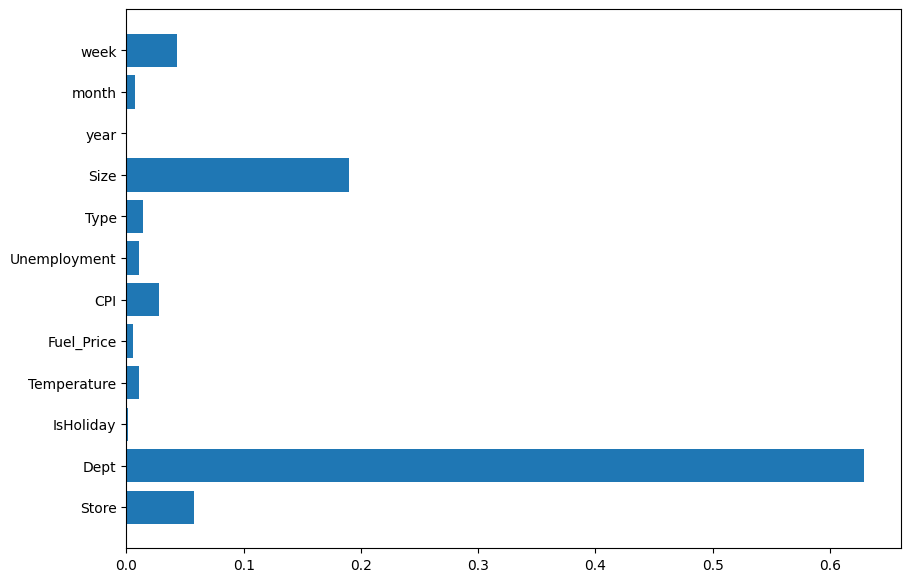

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.barh(Features.columns, rf.feature_importances_)

***Model***

In [ ]:
data = pd.read_csv(r"D:data_clean.csv")


In [ ]:
data

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
420208,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
420209,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
420210,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


In [ ]:
# x = data.drop(['Weekly_Sales','Size', 'year', 'month', 'week'], axis = 1)
# y = data['Weekly_Sales']

***Linear Regression***

In [ ]:
x = data.drop(['Weekly_Sales','Size','IsHoliday', 'year', 'month', 'week'], axis = 1)
y = data['Weekly_Sales']

In [ ]:
x.columns

Index(['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Type'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
print("x Train Shape :",x_train.shape)
print("x Val Shape   :",x_val.shape)
print("y Train Shape :",y_train.shape)
print("y Val Shape   :",y_val.shape)

x Train Shape : (294148, 7)
x Val Shape   : (126064, 7)
y Train Shape : (294148,)
y Val Shape   : (126064,)


In [ ]:
x.columns

Index(['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Type'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)

In [ ]:
lr.score(x_val, y_val)

0.05794610101444586

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_pred, y_val)
r2 = r2_score(y_pred, y_val)
print('Mean Square Error = ', mse)
print('R2 Score = ', r2)

Mean Square Error =  479286745.4245957
R2 Score =  -14.323014131318908


[văn bản liên kết](https://)***Decision Tree Regression***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_val)

In [ ]:
rms_dt = np.sqrt(mean_squared_error(y_pred_dt, y_val))
r2_dt = r2_score(y_pred_dt, y_val)
print('RMSE of DT = ', rms_dt)
print('R2 Score of DT = ', r2_dt)

RMSE of DT =  7505.389009546623
R2 Score of DT =  0.8903981694619187


***Random Forest Regression***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_val)

In [ ]:
rms_rf = np.sqrt(mean_squared_error(y_pred_rf, y_val))
r2_rf = r2_score(y_pred_rf, y_val)
print('RMSE of RF = ', rms_rf)
print('R2 Score of RF = ', r2_rf)

RMSE of RF =  5694.180282880063
R2 Score of RF =  0.9331227217005335


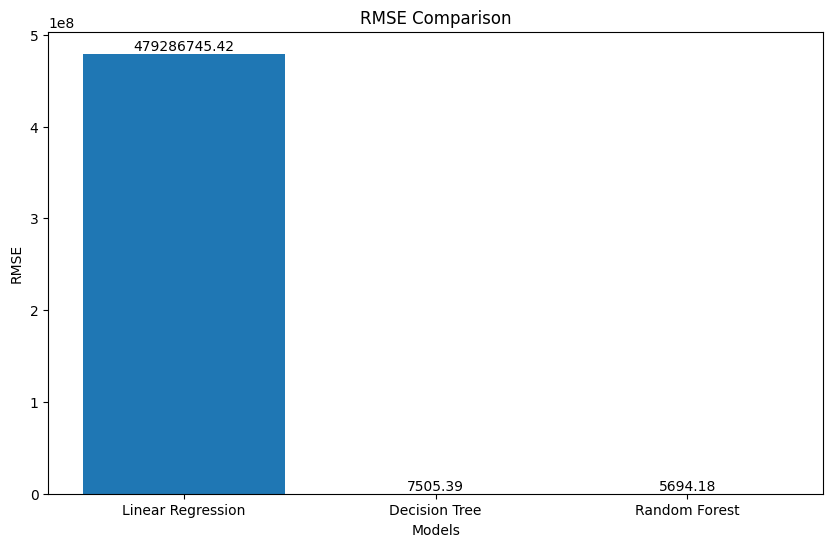

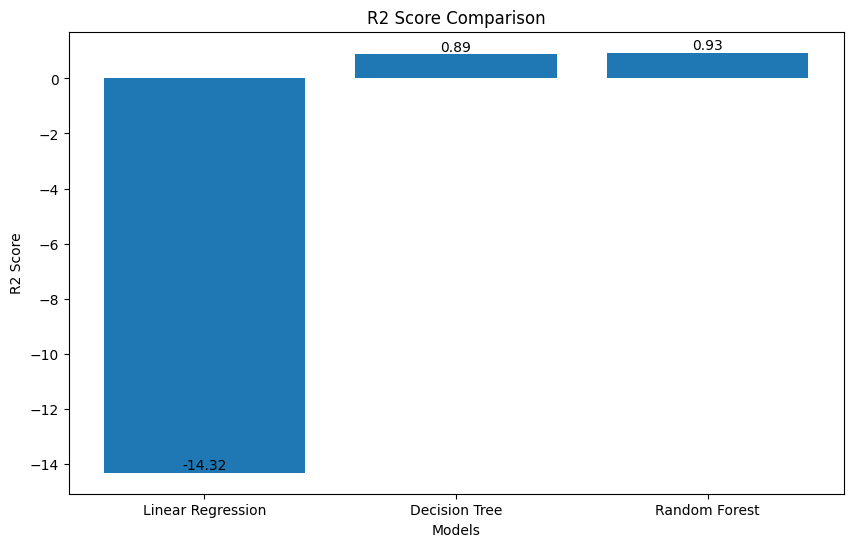

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_scores = [mse, rms_dt, rms_rf]
r2_scores = [r2, r2_dt, r2_rf]

# Vẽ biểu đồ RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# Hiển thị giá trị RMSE trên cột
for i in range(len(models)):
    plt.text(i, rmse_scores[i], str(round(rmse_scores[i], 2)), ha='center', va='bottom')

plt.show()

# Vẽ biểu đồ R2
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')

# Hiển thị giá trị R2 trên cột
for i in range(len(models)):
    plt.text(i, r2_scores[i], str(round(r2_scores[i], 2)), ha='center', va='bottom')

plt.show()


***Submission***

In [ ]:
data = pd.read_csv(r"D:data_clean.csv")

In [ ]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'year', 'month',
       'week'],
      dtype='object')

In [ ]:
test = data.drop(['Weekly_Sales','IsHoliday', 'year', 'month', 'week'], axis=1)


In [ ]:
test.dtypes

Store             int64
Dept              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int64
Size              int64
dtype: object

In [ ]:
x.columns

Index(['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Type'],
      dtype='object')

In [ ]:
test.drop(['Size'], axis = 1, inplace = True)

In [ ]:
prediction = rf_model.predict(test)

In [ ]:
submission = pd.read_csv("D:\Học\DAP\project\sampleSubmission.csv")

In [ ]:
# print(submission.head())
# print(prediction[:5])
prediction = prediction[:115064]

In [ ]:
# num_outputs = len(prediction)  # Sử dụng len() để đếm số lượng phần tử trong 'prediction'
# print("Tổng số output trong prediction:", num_outputs)


Tổng số output trong prediction: 115064


In [ ]:
submission['Weekly_Sales'] = prediction

In [ ]:
submission.to_csv('submission1.csv', index=False)